# CNN Assignment

## Set-up enviorment

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import collections
import pickle

import cv2

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

## Load Data

In [2]:
# Define path
PATH = "C:\\Users\\joshp\\OneDrive - Northwestern University\\MSDS\\2025\\Fall 2025\\MSDS 422\\Unit 99\\CNN\\Assignment\\cat-and-dog"

TRAIN_PATH = PATH + "\\TRAIN"
TEST_PATH = PATH + "\\TEST"

CATEGORIES = ["CAT","DOG"]

In [3]:
# Define user function
def getImages(WHERE, IMG_SIZE):
    imgList = []
    for category in CATEGORIES:
        target_num = CATEGORIES.index(category)
        path = os.path.join(WHERE, category)
        print("path=", path)
        for img in os.listdir(path):
            try:
                filename = os.path.join(path, img)
                img_array = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
                print("BEFORE .... ", img_array.shape)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                print("AFTER .... ", new_array.shape)
                imgList.append([new_array, target_num])
            except Exception as e:
                pass
    return imgList

In [4]:
# Set-up image size
IMG_SIZE = 96

totalData = getImages(TRAIN_PATH, IMG_SIZE) + getImages(TEST_PATH, IMG_SIZE)

path= C:\Users\joshp\OneDrive - Northwestern University\MSDS\2025\Fall 2025\MSDS 422\Unit 99\CNN\Assignment\cat-and-dog\TRAIN\CAT
BEFORE ....  (280, 300)
AFTER ....  (96, 96)
BEFORE ....  (499, 489)
AFTER ....  (96, 96)
BEFORE ....  (499, 403)
AFTER ....  (96, 96)
BEFORE ....  (149, 150)
AFTER ....  (96, 96)
BEFORE ....  (499, 336)
AFTER ....  (96, 96)
BEFORE ....  (407, 379)
AFTER ....  (96, 96)
BEFORE ....  (269, 259)
AFTER ....  (96, 96)
BEFORE ....  (375, 499)
AFTER ....  (96, 96)
BEFORE ....  (333, 500)
AFTER ....  (96, 96)
BEFORE ....  (375, 499)
AFTER ....  (96, 96)
BEFORE ....  (374, 500)
AFTER ....  (96, 96)
BEFORE ....  (368, 328)
AFTER ....  (96, 96)
BEFORE ....  (400, 353)
AFTER ....  (96, 96)
BEFORE ....  (200, 296)
AFTER ....  (96, 96)
BEFORE ....  (374, 500)
AFTER ....  (96, 96)
BEFORE ....  (273, 500)
AFTER ....  (96, 96)
BEFORE ....  (374, 500)
AFTER ....  (96, 96)
BEFORE ....  (480, 500)
AFTER ....  (96, 96)
BEFORE ....  (335, 344)
AFTER ....  (96, 96)
BEFORE ....  (3

## Test random pictures

Total Images 9906
Category CAT = 5009
Category DOG = 4897


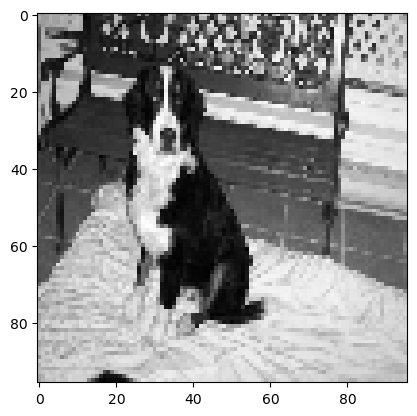

This is a DOG


In [5]:
who = 0

print("Total Images",len(totalData))
countList = [i[1] for i in totalData]
ctr = collections.Counter(countList)
for i in CATEGORIES :
    print("Category",i,"=",ctr[CATEGORIES.index(i)])

random.shuffle(totalData)
theRecord = totalData[who]
theValue = theRecord[1]
theImg = theRecord[0]
plt.imshow(theImg, cmap="gray")
plt.show()

print("This is a",CATEGORIES[theValue])

Total Images 9906
Category CAT = 5009
Category DOG = 4897


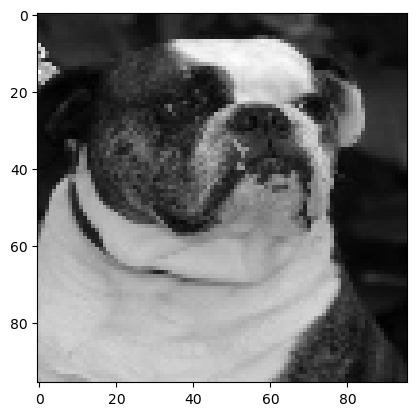

This is a DOG


In [6]:
who = 0

print("Total Images",len(totalData))
countList = [i[1] for i in totalData]
ctr = collections.Counter(countList)
for i in CATEGORIES :
    print("Category",i,"=",ctr[CATEGORIES.index(i)])

random.shuffle(totalData)
theRecord = totalData[who]
theValue = theRecord[1]
theImg = theRecord[0]
plt.imshow(theImg, cmap="gray")
plt.show()

print("This is a",CATEGORIES[theValue])

In [7]:
# Split Data
X = []
Y = []

for [features,label] in totalData:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X.shape)

Y = np.array(Y).reshape(-1,)
print(Y.shape)

(9906, 96, 96, 1)
(9906,)


In [8]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

## Normalize Data

In [9]:
pickle_in = open("X.pickle","rb")
XRAW = pickle.load( pickle_in )
pickle_in.close()

pickle_in = open("Y.pickle","rb")
Y = pickle.load( pickle_in )
pickle_in.close()

In [10]:
# Normalize Data
X = XRAW / 255.0

# Create copy
Z = X[0]
print(X.shape)
print(Z.shape)

(9906, 96, 96, 1)
(96, 96, 1)


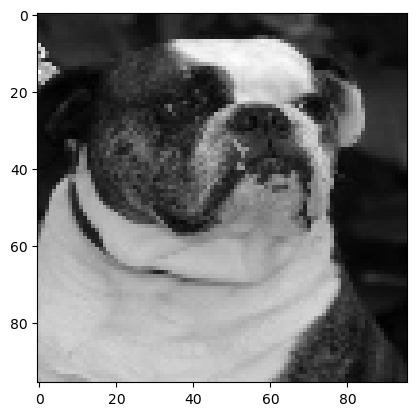

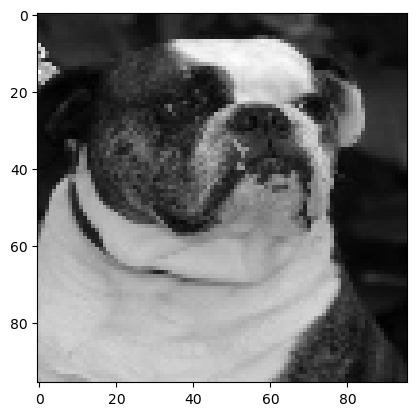

In [11]:
# Test new data
WHO = 0

IMG_SIZE = Z.shape[0]

IMG = XRAW[WHO]
IMG = cv2.resize(IMG, (IMG_SIZE, IMG_SIZE))
plt.imshow(IMG , cmap="gray")
plt.show()

IMG = X[WHO]
IMG = cv2.resize(IMG, (IMG_SIZE, IMG_SIZE))
plt.imshow(IMG , cmap="gray")
plt.show()

## Split Data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

## Define Model Metrics

In [13]:
def get_TF_ProbAccuracyScores(NAME, MODEL, X, Y):
    probs = MODEL.predict(X)
    pred_list = []
    for p in probs:
        pred_list.append(np.argmax(p))
    pred = np.array(pred_list)
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_ROC_Curve(TITLE, LIST):
    pass
    fig = plt.figure(figsize=(6,4))
    plt.title(TITLE)
    for theResults in LIST:
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = f"AUC {NAME} {auc:0.2f}"
        plt.plot(fpr, tpr, label = theLabel)
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.savefig(f"{TITLE}_ROC_Curve.png", dpi=300, bbox_inches="tight")
    plt.show()

def print_Accuracy(TITLE, LIST):
    print(TITLE)
    print("======")
    for theResults in LIST:
        NAME = theResults[0]
        ACC = theResults[1]
        print(NAME, " = ", ACC)
    print( "------\n\n")

## CNN Model

In [14]:
# Hyperparameters of model
B_theShapeSize = Z.shape
B_theActivation = tf.keras.activations.relu
B_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
B_theOptimizer = tf.keras.optimizers.Adam()

B_theEpochs = 20
B_theUnits = 32

In [15]:
# Create model
B_LAYER_CONV2D_01 = tf.keras.layers.Conv2D(B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize)
B_LAYER_POOL_01 = tf.keras.layers.MaxPooling2D( pool_size=(2,2))

B_LAYER_CONV2D_02 = tf.keras.layers.Conv2D(2*B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize)
B_LAYER_POOL_02 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

B_LAYER_CONV2D_03 = tf.keras.layers.Conv2D(4*B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize)
B_LAYER_POOL_03 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

B_LAYER_CONV2D_04 = tf.keras.layers.Conv2D(4*B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize)
B_LAYER_POOL_04 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))


B_LAYER_FLATTEN = tf.keras.layers.Flatten()

B_LAYER_DENSE_01 = tf.keras.layers.Dense(units=8*B_theUnits, activation=B_theActivation)
B_LAYER_DROP = tf.keras.layers.Dropout(0.2)
B_LAYER_DENSE_02 = tf.keras.layers.Dense(units=B_theUnits, activation=B_theActivation)
B_LAYER_OUT = tf.keras.layers.Dense(2, activation=tf.nn.softmax)

model_B = tf.keras.models.Sequential()

model_B.add(B_LAYER_CONV2D_01)
model_B.add(B_LAYER_POOL_01)
model_B.add(B_LAYER_CONV2D_02)
model_B.add(B_LAYER_POOL_02)
model_B.add(B_LAYER_CONV2D_03)
model_B.add(B_LAYER_POOL_03)
model_B.add(B_LAYER_CONV2D_04)
model_B.add(B_LAYER_POOL_04)
model_B.add(B_LAYER_FLATTEN)
model_B.add(B_LAYER_DENSE_01)
model_B.add(B_LAYER_DROP)
model_B.add(B_LAYER_DENSE_02)
model_B.add(B_LAYER_OUT)

model_B.compile(optimizer = B_theOptimizer, loss=B_theLossMetric, metrics=['accuracy'])
model_B.fit(X_train, Y_train, epochs=B_theEpochs, validation_split=0.2, batch_size=32)

C:\Users\joshp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.5138 - loss: 0.6919 - val_accuracy: 0.5868 - val_loss: 0.6669
Epoch 2/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.6176 - loss: 0.6578 - val_accuracy: 0.6845 - val_loss: 0.6286
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.6834 - loss: 0.5985 - val_accuracy: 0.7136 - val_loss: 0.5782
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.7263 - loss: 0.5376 - val_accuracy: 0.7502 - val_loss: 0.5235
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.7690 - loss: 0.4831 - val_accuracy: 0.7640 - val_loss: 0.5046
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.8055 - loss: 0.4220 - val_accuracy: 0.7754 - val_loss: 0.4607
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.8342 - loss: 0.3720 - val_accuracy: 0.7785 - val_loss: 0.5028
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.8598 - loss: 0.3240 - 

248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


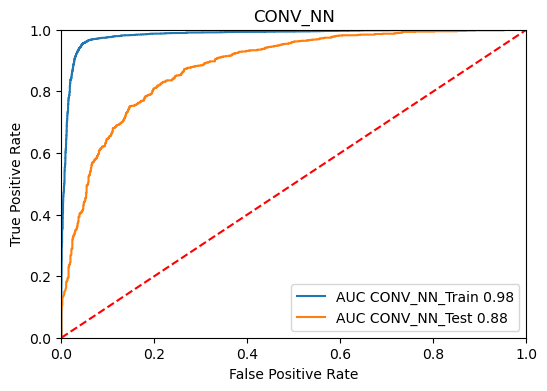

CONV_NN CLASSIFICATION ACCURACY
CONV_NN_Train  =  0.9549469964664311
CONV_NN_Test  =  0.805247225025227
------




In [16]:
# Print metrics
WHO = "CONV_NN"

TRAIN_RES = get_TF_ProbAccuracyScores(WHO + "_Train", model_B, X_train, Y_train)
TEST_RES = get_TF_ProbAccuracyScores(WHO + "_Test", model_B, X_test, Y_test)

print_ROC_Curve(WHO, [TRAIN_RES, TEST_RES]) 
print_Accuracy(WHO + " CLASSIFICATION ACCURACY", [TRAIN_RES, TEST_RES])

In [17]:
# Save model
tf.keras.models.save_model(model_B, "TFNN.pet.model.keras")

## Load Model

In [18]:
# Load model
tf.keras.utils.get_custom_objects().update({'softmax_v2': tf.nn.softmax})

model = tf.keras.models.load_model("TFNN.pet.model.keras")

## Predict New Images

In [19]:
# Set up path
PATH = "C:\\Users\\joshp\\OneDrive - Northwestern University\\MSDS\\2025\\Fall 2025\\MSDS 422\\Unit 99\\CNN\\Assignment"

In [20]:
# Set up new images
IMG_SIZE = 96
IMGFILE = "CAT_001.JPEG"

In [21]:
# Get new images
FILENAME = os.path.join(PATH, IMGFILE)
print(FILENAME)
IMG_RAW = cv2.imread(FILENAME, cv2.IMREAD_GRAYSCALE)
IMG = cv2.resize(IMG_RAW, (IMG_SIZE, IMG_SIZE))

X_RAW = np.array(IMG).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

C:\Users\joshp\OneDrive - Northwestern University\MSDS\2025\Fall 2025\MSDS 422\Unit 99\CNN\Assignment\CAT_001.JPEG


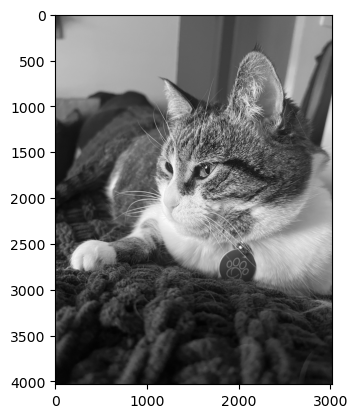

In [22]:
# Show raw image
plt.imshow(IMG_RAW, cmap="gray")
plt.show()

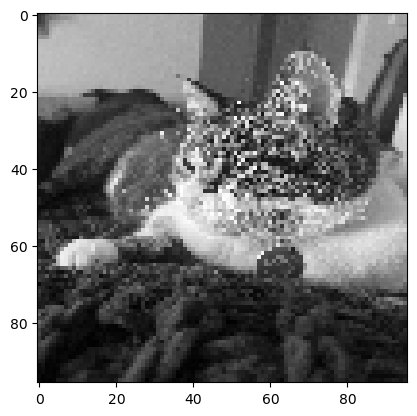

In [23]:
# Show compressed image
plt.imshow(IMG, cmap="gray")
plt.show()

In [24]:
# Normalize the Data
print(X_RAW.shape)
print(X_RAW.shape[1:])

X = X_RAW/255.0

(1, 96, 96, 1)
(96, 96, 1)


In [25]:
Y = model.predict(X)
Y = list(Y[0])
print(Y)

maxValue = max(Y)
theIndex = Y.index(maxValue)

print("This is a .....", CATEGORIES[theIndex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[np.float32(0.9999825), np.float32(1.7526978e-05)]
This is a ..... CAT


In [26]:
# Set up new images
IMG_SIZE = 96
IMGFILE = "CAT_002.jpg"

In [27]:
# Get new images
FILENAME = os.path.join(PATH, IMGFILE)
print(FILENAME)
IMG_RAW = cv2.imread(FILENAME, cv2.IMREAD_GRAYSCALE)
IMG = cv2.resize(IMG_RAW, (IMG_SIZE, IMG_SIZE))

X_RAW = np.array(IMG).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

C:\Users\joshp\OneDrive - Northwestern University\MSDS\2025\Fall 2025\MSDS 422\Unit 99\CNN\Assignment\CAT_002.jpg


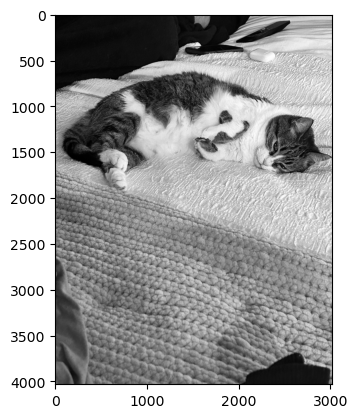

In [28]:
# Show raw image
plt.imshow(IMG_RAW, cmap="gray")
plt.show()

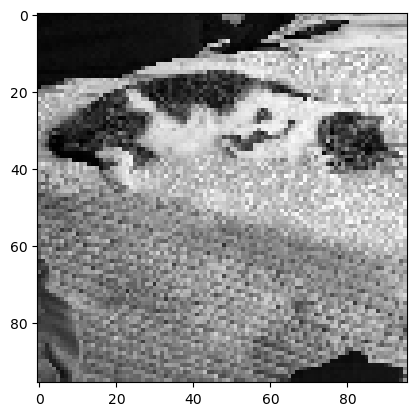

In [29]:
# Show compressed image
plt.imshow(IMG, cmap="gray")
plt.show()

In [30]:
# Normalize the Data
print(X_RAW.shape)
print(X_RAW.shape[1:])

X = X_RAW/255.0

(1, 96, 96, 1)
(96, 96, 1)


In [31]:
Y = model.predict(X)
Y = list(Y[0])
print(Y)

maxValue = max(Y)
theIndex = Y.index(maxValue)

print("This is a .....", CATEGORIES[theIndex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[np.float32(1.951159e-06), np.float32(0.9999981)]
This is a ..... DOG


In [32]:
# Set up new images
IMG_SIZE = 96
IMGFILE = "CAT_003.JPG"

In [33]:
# Get new images
FILENAME = os.path.join(PATH, IMGFILE)
print(FILENAME)
IMG_RAW = cv2.imread(FILENAME, cv2.IMREAD_GRAYSCALE)
IMG = cv2.resize(IMG_RAW, (IMG_SIZE, IMG_SIZE))

X_RAW = np.array(IMG).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

C:\Users\joshp\OneDrive - Northwestern University\MSDS\2025\Fall 2025\MSDS 422\Unit 99\CNN\Assignment\CAT_003.JPG


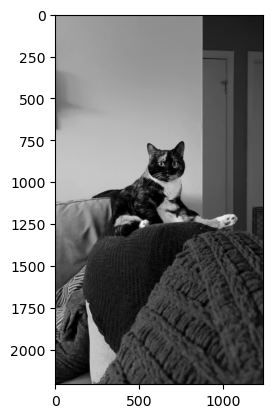

In [34]:
# Show raw image
plt.imshow(IMG_RAW, cmap="gray")
plt.show()

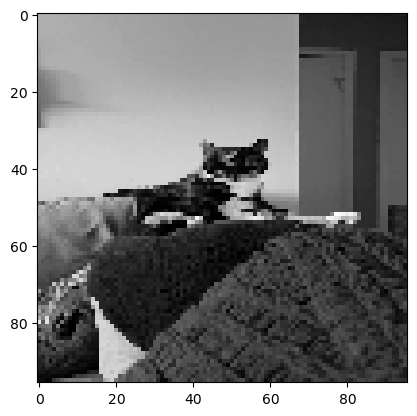

In [35]:
# Show compressed image
plt.imshow(IMG, cmap="gray")
plt.show()

In [36]:
# Normalize the Data
print(X_RAW.shape)
print(X_RAW.shape[1:])

X = X_RAW/255.0

(1, 96, 96, 1)
(96, 96, 1)


In [37]:
Y = model.predict(X)
Y = list(Y[0])
print(Y)

maxValue = max(Y)
theIndex = Y.index(maxValue)

print("This is a .....", CATEGORIES[theIndex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[np.float32(0.9760892), np.float32(0.023910778)]
This is a ..... CAT


In [38]:
# Set up new images
IMG_SIZE = 96
IMGFILE = "DOG_001.JPG"

In [39]:
# Get new images
FILENAME = os.path.join(PATH, IMGFILE)
print(FILENAME)
IMG_RAW = cv2.imread(FILENAME, cv2.IMREAD_GRAYSCALE)
IMG = cv2.resize(IMG_RAW, (IMG_SIZE, IMG_SIZE))

X_RAW = np.array(IMG).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

C:\Users\joshp\OneDrive - Northwestern University\MSDS\2025\Fall 2025\MSDS 422\Unit 99\CNN\Assignment\DOG_001.JPG


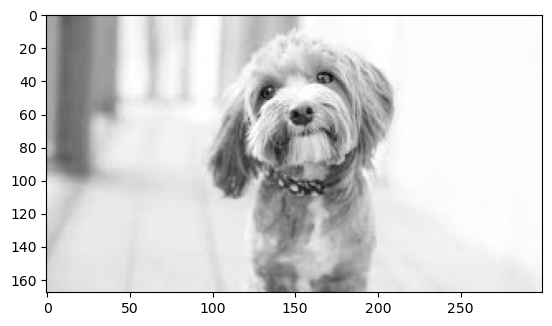

In [40]:
# Show raw image
plt.imshow(IMG_RAW, cmap="gray")
plt.show()

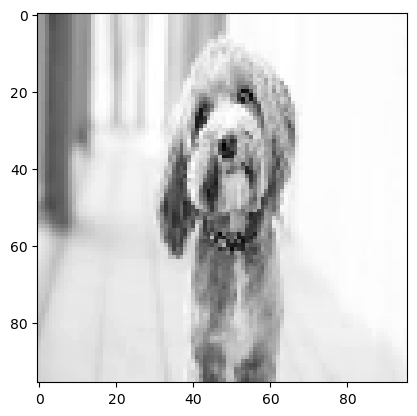

In [41]:
# Show compressed image
plt.imshow(IMG, cmap="gray")
plt.show()

In [42]:
# Normalize the Data
print(X_RAW.shape)
print(X_RAW.shape[1:])

X = X_RAW/255.0

(1, 96, 96, 1)
(96, 96, 1)


In [43]:
Y = model.predict(X)
Y = list(Y[0])
print(Y)

maxValue = max(Y)
theIndex = Y.index(maxValue)

print("This is a .....", CATEGORIES[theIndex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[np.float32(9.714913e-08), np.float32(0.9999999)]
This is a ..... DOG


## Summary

The results of the CNN model indicate that while the network learned the training data extremely well, almost perfect accuracy and the testing accuracy was 80%. However, the validation accuracy only hovered around 79%, which indicates that there may have been some overfitting of the model. The dataset itself was balanced, with nearly equal numbers of cat and dog images, so the performance differences were not caused by class imbalance. 

When testing the model on new images found online or provided personally, the CNN successfully classified the example cat and dog images used. For instance, the predictions for `CAT_001` and `CAT_003` both indicated the model was confident that the images were of cats, although the certainty was slightly lower in the second image. These correct classifications suggest that the model performs well when the input images resemble the style, lighting, and composition of the training set.

Although the tested images were labeled correctly, the model will not always perform perfectly. The overfitting observed during training means the network may misclassify images that deviate from the typical patterns it learned, such as photos with unusual angles, dim lighting, or partially obscured animals. Additionally, the relatively low input resolution may cause the model to lose fine-grained details that distinguish certain breeds or features. These factors help explain why the model might misclassify some images even though it handles the clearer, well-framed examples correctly. Overall, while the model shows strong performance on familiar image types, its generalization ability could be improved with regularization techniques, data augmentation, or a more complex model architecture.